In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import statsmodels.api as sm
import kds
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from matplotlib import rcParams
from termcolor import colored as cl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# Create a dataframe with imported csv file
df = pd.read_csv(r'C:\Users\kirka\OneDrive\Documents\Coursework\Data Prep\week 5\creditcard.csv')

In [2]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:>

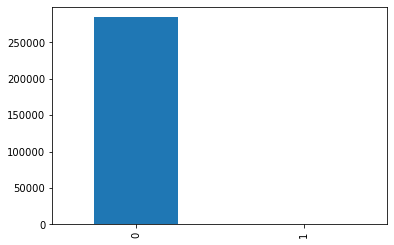

In [5]:
df['Class'].value_counts().plot(kind='bar')

In [6]:
X = df.drop(['Class','Time','Amount','V6','V8','V13','V15', 'V23'], axis=1)
y = df['Class']

In [7]:
X.shape

(284807, 23)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V7      284807 non-null  float64
 6   V9      284807 non-null  float64
 7   V10     284807 non-null  float64
 8   V11     284807 non-null  float64
 9   V12     284807 non-null  float64
 10  V14     284807 non-null  float64
 11  V16     284807 non-null  float64
 12  V17     284807 non-null  float64
 13  V18     284807 non-null  float64
 14  V19     284807 non-null  float64
 15  V20     284807 non-null  float64
 16  V21     284807 non-null  float64
 17  V22     284807 non-null  float64
 18  V24     284807 non-null  float64
 19  V25     284807 non-null  float64
 20  V26     284807 non-null  float64
 21  V27     28

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [10]:
df_train, df_test = train_test_split(df, test_size = 0.3, stratify=df['Class'], random_state=888)
features = df_train.drop(columns=['Class','Time', 'Amount', 'V6', 'V8', 'V13', 'V15', 'V23']).columns

In [11]:
df_test_y = df_test['Class']
df_test_y

43446     0
170593    0
223374    0
197224    0
41941     0
         ..
198999    0
247149    0
147383    0
175286    0
154478    0
Name: Class, Length: 85443, dtype: int64

In [12]:
df_train['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [13]:
df_test['Class'].value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [14]:
clf = LogisticRegression(random_state=888)

In [15]:
clf.fit(df_train[features], df_train['Class'])

LogisticRegression(random_state=888)

In [16]:
y_pred = clf.predict_proba(df_test[features])[:,1]

In [17]:
roc_auc_score(df_test['Class'], y_pred)

0.963951421378586

In [18]:
kds.metrics.decile_table(df_test_y, y_pred)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.001,1.000,0.014,8545.0,134.0,8411.0,14.8,148,1.568,8545.0,134.0,148,8411.0,10.001,90.541,100.0,9.861,80.680,9.053
1,2,0.001,0.001,0.001,8544.0,4.0,8540.0,14.8,0,0.047,17089.0,138.0,148,16951.0,20.000,93.243,100.0,19.873,73.370,4.662
2,3,0.000,0.001,0.000,8544.0,2.0,8542.0,14.8,0,0.023,25633.0,140.0,148,25493.0,30.000,94.595,100.0,29.888,64.707,3.153
3,4,0.000,0.000,0.000,8545.0,2.0,8543.0,14.8,0,0.023,34178.0,142.0,148,34036.0,40.001,95.946,100.0,39.904,56.042,2.399
4,5,0.000,0.000,0.000,8544.0,3.0,8541.0,14.8,0,0.035,42722.0,145.0,148,42577.0,50.001,97.973,100.0,49.917,48.056,1.959
5,6,0.000,0.000,0.000,8544.0,1.0,8543.0,14.8,0,0.012,51266.0,146.0,148,51120.0,60.000,98.649,100.0,59.933,38.716,1.644
6,7,0.000,0.000,0.000,8545.0,2.0,8543.0,14.8,0,0.023,59811.0,148.0,148,59663.0,70.001,100.000,100.0,69.949,30.051,1.429
7,8,0.000,0.000,0.000,8544.0,0.0,8544.0,14.8,0,0.000,68355.0,148.0,148,68207.0,80.001,100.000,100.0,79.966,20.034,1.250
8,9,0.000,0.000,0.000,8544.0,0.0,8544.0,14.8,0,0.000,76899.0,148.0,148,76751.0,90.000,100.000,100.0,89.983,10.017,1.111
9,10,0.000,0.000,0.000,8544.0,0.0,8544.0,14.8,0,0.000,85443.0,148.0,148,85295.0,100.000,100.000,100.0,100.000,0.000,1.000


In [19]:
combine_data = pd.DataFrame({"Actual": df_test_y, "Predictions": y_pred})

In [29]:
combine_data['score_rank'] = pd.qcut(combine_data['Predictions'],100,labels=['r1','r2','r3','r4','r5','r6','r7',
    'r8','r9','r10','r11','r12','r13','r14','r15','r16','r17','r18','r19','r20','r21', 'r22', 'r23','r24','r25',
'r26','r27','r28','r29','r30','r31','r32','r33','r34','r35','r36','r37','r38','r39','r40','r41','r42','r43','r44','r45','r46',
'r47','r48','r49','r50','r51','r52','r53','r54','r55','r56','r57','r58','r59','r60','r61','r62','r63','r64','r65','r66','r67',
'r68','r69','r70','r71','r72','r73','r74','r75','r76','r77','r78','r79','r80','r81','r82','r83','r84','r85','r86','r87','r88',
'r89','r90','r91','r92','r93','r94','r95','r96','r97','r98','r99','r100'])

In [30]:
combine_data

,Actual,Predictions,score_rank
43446,0,0.000148,r41
170593,0,0.000086,r26
223374,0,0.002144,r98
197224,0,0.000629,r85
41941,0,0.000401,r73
...,...,...,...
198999,0,0.000455,r77
247149,0,0.000229,r55
147383,0,0.000087,r26
175286,0,0.001676,r96


In [31]:
pd.crosstab(combine_data['score_rank'],combine_data['Actual'])

Actual,0,1
score_rank,,
r1,855,0
r2,854,0
r3,855,0
r4,854,0
r5,855,0
...,...,...
r96,854,1
r97,855,0
r98,852,2


In [28]:
combine_data.to_csv('combine_data_cc_fraud.csv')

In [641]:
lr_model = sm.Logit(y_train, X_train)

In [642]:
result = lr_model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.646596
         Iterations 8


In [643]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199341
Method:                           MLE   Df Model:                           22
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  -49.78
Time:                        15:36:09   Log-Likelihood:            -1.2891e+05
converged:                       True   LL-Null:                       -2538.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -0.7782      0.007   -108.774      0.000      -0.792      -0.764
V2             0.7943      0.008    101.095      0.000       0.779       0.810
V3            -1.7097      0.015   -113.796      0.000      -1.739      -1.680
V4             0.9914      0.009    109.750      0.000       0.974       1.009
V5            -1.2325      0.012   -103.537      0.000      -1.256      -1.209
V7            -2.2273      0.019   -114.229      0.000      -2.266      -2.189
V9            -1.1112      0.011   -105.376      0.000      -1.132      -1.091
V10           -2.5663      0.023   -113.976      0.000      -2.610      -2.522
V11            1.7409      0.015    112.720      0.000       1.711       1.771
V12           -3.1183      0.027   -116.127      0.000      -3.171      -3.066
V14           -3.2115      0.028   -116.420      0.000      -3.266      -3.157
V16           -2.9206      0.025   -115.806      0.000      -2.970      -2.871
V17           -5.3451      0.046   -116.931      0.000      -5.435      -5.256
V18           -1.9893      0.018   -111.805      0.000      -2.024      -1.954
V19            0.6279      0.008     79.626      0.000       0.612       0.643
V20            0.4175      0.009     47.841      0.000       0.400       0.435
V21            0.2560      0.012     20.797      0.000       0.232       0.280
V22            0.0994      0.007     13.306      0.000       0.085       0.114
V24           -0.0356      0.008     -4.607      0.000      -0.051      -0.020
V25            0.0952      0.009     10.242      0.000       0.077       0.113
V26            0.0444      0.010      4.554      0.000       0.025       0.063
V27            0.5546      0.015     38.111      0.000       0.526       0.583
V28            0.2001      0.017     11.623      0.000       0.166       0.234
==============================================================================
"""

In [644]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: -49.778    
Dependent Variable: Class            AIC:              257861.8887
Date:               2022-08-13 15:36 BIC:              258096.5551
No. Observations:   199364           Log-Likelihood:   -1.2891e+05
Df Model:           22               LL-Null:          -2538.7    
Df Residuals:       199341           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
V1       -0.7782     0.0072   -108.7738   0.0000   -0.7922   -0.7642
V2        0.7943     0.0079    101.0946   0.0000    0.7789    0.8097
V3       -1.7097     0.0150   -113.7965   0.0000   -1.7392   -1.6803
V4        0.9914     0.0090    109.7498   0.0000    0.9737    1.0091
V5       -1.2325     0.0119   -103.5369   0.0000   -1.2558   -1.2091
V7       -2.2273     0.0195   -114.2294   0.0000   -2.2656   -2.1891
V9       -1.1112     0.0105   -105.3762   0.0000   -1.1319   -1.0905
V10      -2.5663     0.0225   -113.9755   0.0000   -2.6104   -2.5221
V11       1.7409     0.0154    112.7196   0.0000    1.7106    1.7712
V12      -3.1183     0.0269   -116.1270   0.0000   -3.1709   -3.0656
V14      -3.2115     0.0276   -116.4195   0.0000   -3.2655   -3.1574
V16      -2.9206     0.0252   -115.8059   0.0000   -2.9700   -2.8712
V17      -5.3451     0.0457   -116.9312   0.0000   -5.4347   -5.2555
V18      -1.9893     0.0178   -111.8050   0.0000   -2.0241   -1.9544
V19       0.6279     0.0079     79.6258   0.0000    0.6125    0.6434
V20       0.4175     0.0087     47.8411   0.0000    0.4004    0.4346
V21       0.2560     0.0123     20.7970   0.0000    0.2319    0.2801
V22       0.0994     0.0075     13.3056   0.0000    0.0847    0.1140
V24      -0.0356     0.0077     -4.6072   0.0000   -0.0507   -0.0205
V25       0.0952     0.0093     10.2421   0.0000    0.0770    0.1135
V26       0.0444     0.0097      4.5545   0.0000    0.0253    0.0634
V27       0.5546     0.0146     38.1111   0.0000    0.5261    0.5831
V28       0.2001     0.0172     11.6227   0.0000    0.1664    0.2339
==================================================================

"""

In [674]:
msk = df_train['Class'] == 1
num_to_oversample = len(df_train) - 2*msk.sum()
df_positive_oversample = df_train[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df_train, df_positive_oversample])
df_train_oversample['Class'].value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [675]:
clf = LogisticRegression(random_state=888)

In [676]:
clf.fit(df_train_oversample[features], df_train_oversample['Class'])
y_pred = clf.predict_proba(df_test[features])[:,1]

In [677]:
roc_auc_score(df_test['Class'], y_pred)

0.9691078498628766

In [678]:
kds.metrics.decile_table(df_test_y, y_pred)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.182,1.000,0.397,8545.0,134.0,8411.0,14.8,148,1.568,8545.0,134.0,148,8411.0,10.001,90.541,100.0,9.861,80.680,9.053
1,2,0.095,0.182,0.131,8544.0,6.0,8538.0,14.8,0,0.070,17089.0,140.0,148,16949.0,20.000,94.595,100.0,19.871,74.724,4.730
2,3,0.064,0.095,0.077,8544.0,2.0,8542.0,14.8,0,0.023,25633.0,142.0,148,25491.0,30.000,95.946,100.0,29.886,66.060,3.198
3,4,0.044,0.063,0.053,8545.0,2.0,8543.0,14.8,0,0.023,34178.0,144.0,148,34034.0,40.001,97.297,100.0,39.902,57.395,2.432
4,5,0.031,0.044,0.037,8544.0,2.0,8542.0,14.8,0,0.023,42722.0,146.0,148,42576.0,50.001,98.649,100.0,49.916,48.733,1.973
5,6,0.022,0.031,0.026,8544.0,2.0,8542.0,14.8,0,0.023,51266.0,148.0,148,51118.0,60.000,100.000,100.0,59.931,40.069,1.667
6,7,0.016,0.022,0.019,8545.0,0.0,8545.0,14.8,0,0.000,59811.0,148.0,148,59663.0,70.001,100.000,100.0,69.949,30.051,1.429
7,8,0.011,0.016,0.013,8544.0,0.0,8544.0,14.8,0,0.000,68355.0,148.0,148,68207.0,80.001,100.000,100.0,79.966,20.034,1.250
8,9,0.007,0.011,0.009,8544.0,0.0,8544.0,14.8,0,0.000,76899.0,148.0,148,76751.0,90.000,100.000,100.0,89.983,10.017,1.111
9,10,0.000,0.007,0.004,8544.0,0.0,8544.0,14.8,0,0.000,85443.0,148.0,148,85295.0,100.000,100.000,100.0,100.000,0.000,1.000


In [679]:
smote = SMOTE(random_state=888)
x_resampled, y_resampled = smote.fit_resample(df_train[features], df_train['Class'])

In [680]:
y_resampled.value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [681]:
clf.fit(x_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:,1]

In [682]:
roc_auc_score(df_test['Class'], y_pred)

0.9701794883575762

In [683]:
kds.metrics.decile_table(df_test_y, y_pred)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.181,1.000,0.403,8545.0,134.0,8411.0,14.8,148,1.568,8545.0,134.0,148,8411.0,10.001,90.541,100.0,9.861,80.680,9.053
1,2,0.091,0.181,0.126,8544.0,4.0,8540.0,14.8,0,0.047,17089.0,138.0,148,16951.0,20.000,93.243,100.0,19.873,73.370,4.662
2,3,0.059,0.091,0.073,8544.0,4.0,8540.0,14.8,0,0.047,25633.0,142.0,148,25491.0,30.000,95.946,100.0,29.886,66.060,3.198
3,4,0.041,0.059,0.049,8545.0,3.0,8542.0,14.8,0,0.035,34178.0,145.0,148,34033.0,40.001,97.973,100.0,39.900,58.073,2.449
4,5,0.029,0.041,0.035,8544.0,3.0,8541.0,14.8,0,0.035,42722.0,148.0,148,42574.0,50.001,100.000,100.0,49.914,50.086,2.000
5,6,0.019,0.029,0.024,8544.0,0.0,8544.0,14.8,0,0.000,51266.0,148.0,148,51118.0,60.000,100.000,100.0,59.931,40.069,1.667
6,7,0.014,0.019,0.016,8545.0,0.0,8545.0,14.8,0,0.000,59811.0,148.0,148,59663.0,70.001,100.000,100.0,69.949,30.051,1.429
7,8,0.009,0.014,0.011,8544.0,0.0,8544.0,14.8,0,0.000,68355.0,148.0,148,68207.0,80.001,100.000,100.0,79.966,20.034,1.250
8,9,0.005,0.009,0.007,8544.0,0.0,8544.0,14.8,0,0.000,76899.0,148.0,148,76751.0,90.000,100.000,100.0,89.983,10.017,1.111
9,10,0.000,0.005,0.003,8544.0,0.0,8544.0,14.8,0,0.000,85443.0,148.0,148,85295.0,100.000,100.000,100.0,100.000,0.000,1.000


In [684]:
lr_model = sm.Logit(y_resampled, x_resampled)

In [685]:
result = lr_model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.364017
         Iterations 14


In [686]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                          Logit   Df Residuals:                   398017
Method:                           MLE   Df Model:                           22
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.4748
Time:                        15:47:34   Log-Likelihood:            -1.4489e+05
converged:                       True   LL-Null:                   -2.7590e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -0.6013      0.006    -93.407      0.000      -0.614      -0.589
V2             0.5671      0.006     87.989      0.000       0.554       0.580
V3            -1.3660      0.013   -104.086      0.000      -1.392      -1.340
V4             0.9396      0.008    113.695      0.000       0.923       0.956
V5            -0.8306      0.009    -88.179      0.000      -0.849      -0.812
V7            -1.7031      0.017    -97.768      0.000      -1.737      -1.669
V9            -0.8359      0.009    -90.436      0.000      -0.854      -0.818
V10           -2.0239      0.020   -102.588      0.000      -2.063      -1.985
V11            1.4322      0.014    103.601      0.000       1.405       1.459
V12           -2.5442      0.024   -106.599      0.000      -2.591      -2.497
V14           -2.7750      0.025   -112.099      0.000      -2.823      -2.726
V16           -2.2561      0.022   -100.579      0.000      -2.300      -2.212
V17           -3.9612      0.040    -99.165      0.000      -4.039      -3.883
V18           -1.4175      0.016    -90.711      0.000      -1.448      -1.387
V19            0.4387      0.007     61.661      0.000       0.425       0.453
V20            0.3245      0.008     40.034      0.000       0.309       0.340
V21            0.3446      0.011     30.130      0.000       0.322       0.367
V22            0.0504      0.007      7.172      0.000       0.037       0.064
V24           -0.0489      0.008     -6.502      0.000      -0.064      -0.034
V25            0.0417      0.009      4.745      0.000       0.024       0.059
V26           -0.0689      0.010     -7.215      0.000      -0.088      -0.050
V27            0.4836      0.014     34.482      0.000       0.456       0.511
V28            0.2232      0.017     13.069      0.000       0.190       0.257
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [687]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.475      
Dependent Variable: Class            AIC:              289832.6830
Date:               2022-08-13 15:47 BIC:              290083.2520
No. Observations:   398040           Log-Likelihood:   -1.4489e+05
Df Model:           22               LL-Null:          -2.7590e+05
Df Residuals:       398017           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     14.0000                                       
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
V1       -0.6013     0.0064    -93.4068   0.0000   -0.6139   -0.5887
V2        0.5671     0.0064     87.9890   0.0000    0.5544    0.5797
V3       -1.3660     0.0131   -104.0863   0.0000   -1.3917   -1.3403
V4        0.9396     0.0083    113.6955   0.0000    0.9234    0.9558
V5       -0.8306     0.0094    -88.1791   0.0000   -0.8491   -0.8122
V7       -1.7031     0.0174    -97.7683   0.0000   -1.7373   -1.6690
V9       -0.8359     0.0092    -90.4359   0.0000   -0.8540   -0.8178
V10      -2.0239     0.0197   -102.5879   0.0000   -2.0626   -1.9852
V11       1.4322     0.0138    103.6006   0.0000    1.4051    1.4593
V12      -2.5442     0.0239   -106.5992   0.0000   -2.5910   -2.4975
V14      -2.7750     0.0248   -112.0989   0.0000   -2.8235   -2.7264
V16      -2.2561     0.0224   -100.5794   0.0000   -2.3001   -2.2122
V17      -3.9612     0.0399    -99.1654   0.0000   -4.0395   -3.8829
V18      -1.4175     0.0156    -90.7112   0.0000   -1.4482   -1.3869
V19       0.4387     0.0071     61.6612   0.0000    0.4248    0.4526
V20       0.3245     0.0081     40.0341   0.0000    0.3086    0.3404
V21       0.3446     0.0114     30.1303   0.0000    0.3222    0.3671
V22       0.0504     0.0070      7.1722   0.0000    0.0367    0.0642
V24      -0.0489     0.0075     -6.5020   0.0000   -0.0637   -0.0342
V25       0.0417     0.0088      4.7448   0.0000    0.0245    0.0590
V26      -0.0689     0.0096     -7.2148   0.0000   -0.0877   -0.0502
V27       0.4836     0.0140     34.4818   0.0000    0.4561    0.5111
V28       0.2232     0.0171     13.0693   0.0000    0.1897    0.2566
==================================================================

"""

In [688]:
msk_negative = df_train['Class'] == 0
msk_positive = df_train['Class'] == 1

In [689]:
df_negative_undersample = df_train[msk_negative].sample(n=msk_positive.sum(), random_state = 888)
df_train_undersample = pd.concat([df_negative_undersample, df_train[msk_positive]])

In [690]:
df_train_undersample['Class'].value_counts()

0    344
1    344
Name: Class, dtype: int64

In [691]:
clf.fit(df_train_undersample[features], df_train_undersample['Class'])
y_pred = clf.predict_proba(df_test[features])[:,1]

In [692]:
roc_auc_score(df_test['Class'], y_pred)

0.9685025975034182

In [693]:
kds.metrics.decile_table(df_test_y, y_pred)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.214,1.000,0.527,8545.0,134.0,8411.0,14.8,148,1.568,8545.0,134.0,148,8411.0,10.001,90.541,100.0,9.861,80.680,9.053
1,2,0.099,0.214,0.146,8544.0,6.0,8538.0,14.8,0,0.070,17089.0,140.0,148,16949.0,20.000,94.595,100.0,19.871,74.724,4.730
2,3,0.061,0.099,0.078,8544.0,2.0,8542.0,14.8,0,0.023,25633.0,142.0,148,25491.0,30.000,95.946,100.0,29.886,66.060,3.198
3,4,0.040,0.061,0.050,8545.0,1.0,8544.0,14.8,0,0.012,34178.0,143.0,148,34035.0,40.001,96.622,100.0,39.903,56.719,2.415
4,5,0.025,0.040,0.032,8544.0,4.0,8540.0,14.8,0,0.047,42722.0,147.0,148,42575.0,50.001,99.324,100.0,49.915,49.409,1.986
5,6,0.017,0.025,0.021,8544.0,0.0,8544.0,14.8,0,0.000,51266.0,147.0,148,51119.0,60.000,99.324,100.0,59.932,39.392,1.655
6,7,0.011,0.017,0.014,8545.0,1.0,8544.0,14.8,0,0.012,59811.0,148.0,148,59663.0,70.001,100.000,100.0,69.949,30.051,1.429
7,8,0.008,0.011,0.009,8544.0,0.0,8544.0,14.8,0,0.000,68355.0,148.0,148,68207.0,80.001,100.000,100.0,79.966,20.034,1.250
8,9,0.005,0.008,0.006,8544.0,0.0,8544.0,14.8,0,0.000,76899.0,148.0,148,76751.0,90.000,100.000,100.0,89.983,10.017,1.111
9,10,0.000,0.005,0.003,8544.0,0.0,8544.0,14.8,0,0.000,85443.0,148.0,148,85295.0,100.000,100.000,100.0,100.000,0.000,1.000
